# Conditional Imputation
This is a tutorial on conditional imputation of missing values using ``cImpute``.

First import some third-party packages and ``xomics``:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import xomics as xo

In [26]:
# Settings
xo.plot_settings()
groups = ["d00", "d03", "d07", "d14"]

# Creat imputation object

In [27]:
# Load data
df_raw = xo.load_dataset() 

In [28]:
# Imputation
df_imp = xo.cImpute().run(df=df_raw, groups=groups, min_cs=0.5)
d_min, up_mnar, d_max = xo.cImpute().get_limits(df=df_raw, groups=groups)

OptionError: "No such keys(s): 'mode.use_inf_as_null'"

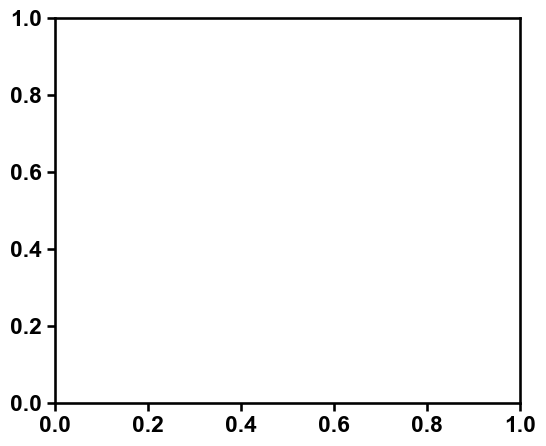

In [29]:
# Plot histogram
pp = xo.PreProcess()
cols_quant = pp.get_qcols(df=df_imp, groups=groups)
xo.plot_settings()
xo.plot_imput_histo(df_raw=df_raw,
                    df_imp=df_imp,
                    d_min=d_min,
                    up_mnar=up_mnar,
                    cols_quant=cols_quant)
plt.show()